<a href="https://colab.research.google.com/github/joanby/trading-algoritmico-a-z-con-python/blob/main/ES_TA_Cap%C3%ADtulo_06_Scalping_usando_la_estrategia_de_price_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>

# Scalping Price Action

<br>

- Scalping: operación basada en negociaciones a corto plazo
- RSI: el indicador que mide los niveles de sobrecompra y sobreventa

💰 Únete a la comunidad de [Discord](https://discord.gg/z3dx5XpkX4)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.es/Python-para-finanzas-trading-algor%C3%ADtmico-ebook/dp/B0BT4ZS9Q3/)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español


In [ ]:
%pip install yfinance
%pip install mpl_finance
%pip install ta

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import ta
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# El código aquí te permitirá cambiar los gráficos a modo oscuro para aquellos que optéis por programar en modo oscuro
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler

colors = cycler(
    "color", ["#669FEE", "#66EE91", "#9988DD", "#EECC55", "#88BB44", "#FFBBBB"]
)
plt.rc("figure", facecolor="#313233")
plt.rc(
    "axes",
    facecolor="#313233",
    edgecolor="none",
    axisbelow=True,
    grid=True,
    prop_cycle=colors,
    labelcolor="gray",
)
plt.rc("grid", color="474A4A", linestyle="solid")
plt.rc("xtick", color="gray")
plt.rc("ytick", direction="out", color="gray")
plt.rc("legend", facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rcParams["figure.figsize"] = [20, 8]

# Importar los datos


In [9]:
# Importar los precios de las acciones de yahoo Finance
dataframe = yf.download("EURUSD=X", start="2010-01-01")

# Creamos una columna de fecha para dibujar el candlestick mas tarde (no es obligatorio)
# Diagrama de vela
# pd.to_datetime -> guardar los datos de la fecha en la nueva columna
dataframe["Date"] = pd.to_datetime(dataframe.index)
# Sobreescribir el valor de la columna date
# apply(mpl_dates.date2num) -> aplicar a los valores el formato requerido para diagrama de velas
dataframe["Date"] = dataframe["Date"].apply(mpl_dates.date2num)

# Cambiar el nombre de las columnas
dataframe.columns = ["open", "high", "low", "close", "adj close", "volume", "date"]
dataframe.index.name = "time"
dataframe

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj close,volume,date
time,,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0,14610.0
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0,14613.0
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0,14614.0
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0,14615.0
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,0,14616.0
...,...,...,...,...,...,...,...
2023-07-25,1.106317,1.108893,1.102208,1.106317,1.106317,0,19563.0
2023-07-26,1.105046,1.108647,1.103838,1.105046,1.105046,0,19564.0
2023-07-27,1.107837,1.115200,1.098491,1.107837,1.107837,0,19565.0


# Creación del Soporte y la Resistencia


In [10]:
# Creamos Columnas Vacías
dataframe["support"] = np.nan
dataframe["resistance"] = np.nan

# Después de 5 descensos consecutivos del mínimo, anotamos este precio como el soporte
dataframe.loc[
    (dataframe["low"].shift(5) > dataframe["low"].shift(4))
    & (dataframe["low"].shift(4) > dataframe["low"].shift(3))
    & (dataframe["low"].shift(3) > dataframe["low"].shift(2))
    & (dataframe["low"].shift(2) > dataframe["low"].shift(1))
    & (dataframe["low"].shift(1) > dataframe["low"].shift(0)),
    "support",
] = dataframe["low"]


# Después de 5 subidas consecutivas del máximo, observamos este precio como la resistencia
dataframe.loc[
    (dataframe["high"].shift(5) < dataframe["high"].shift(4))
    & (dataframe["high"].shift(4) < dataframe["high"].shift(3))
    & (dataframe["high"].shift(3) < dataframe["high"].shift(2))
    & (dataframe["high"].shift(2) < dataframe["high"].shift(1))
    & (dataframe["high"].shift(1) < dataframe["high"].shift(0)),
    "resistance",
] = dataframe["high"]

In [ ]:
dataframe

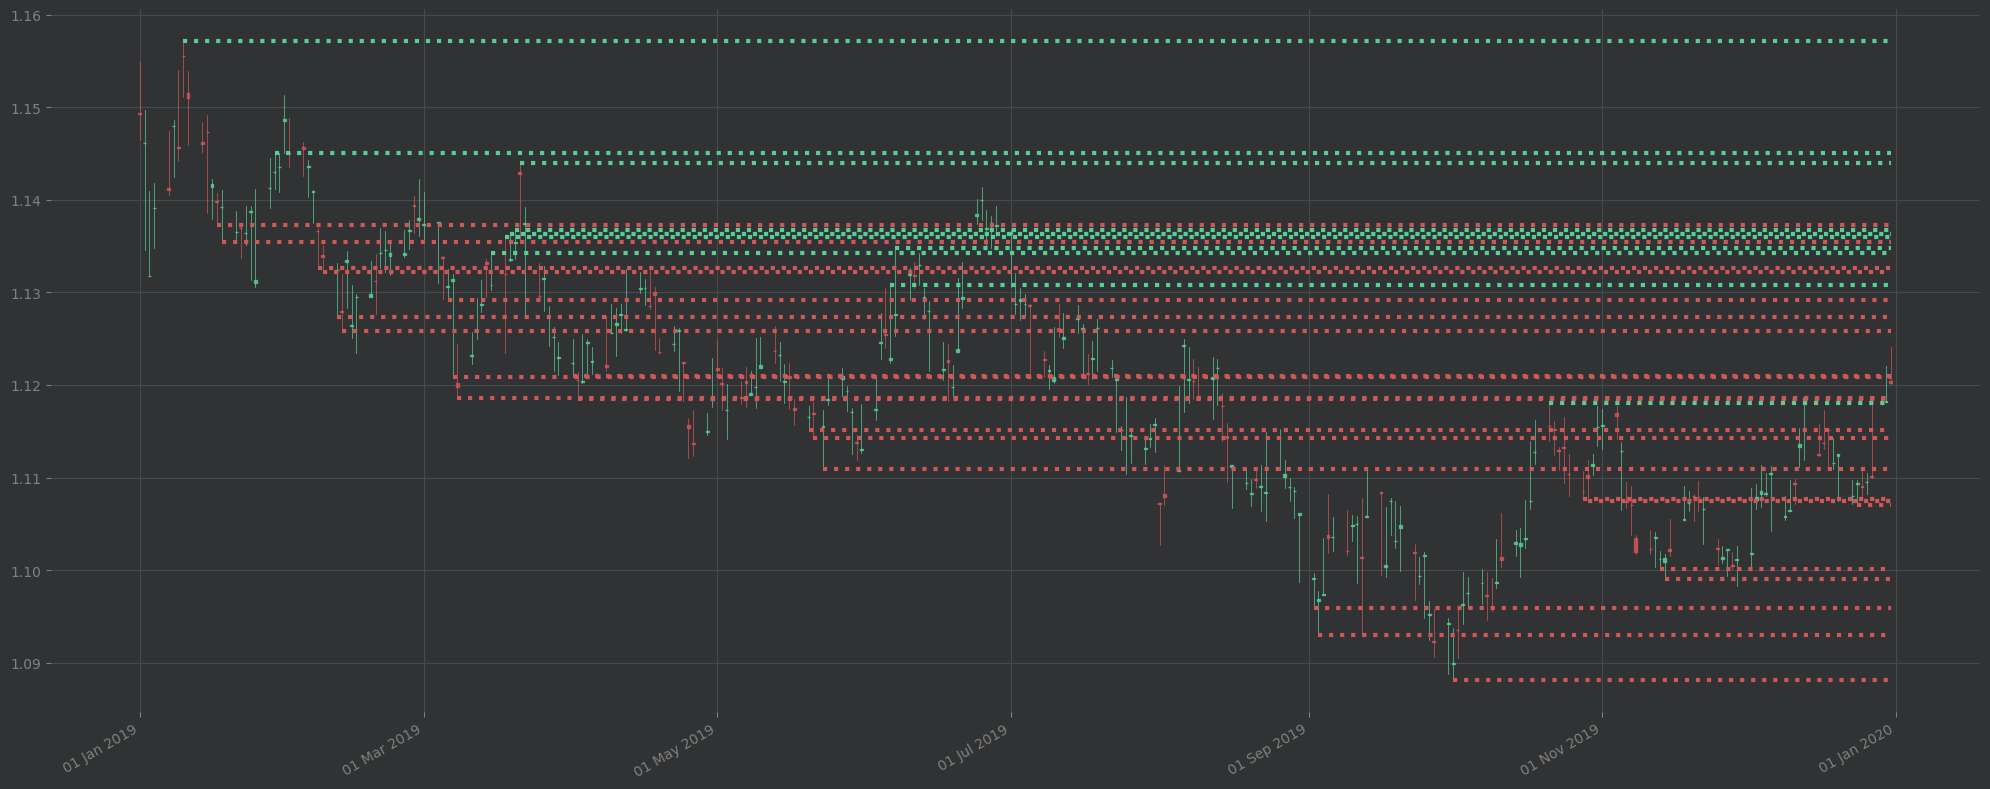

In [31]:
df_bis = dataframe.loc["2019"]

# Inicializar el gráfico
fig, ax = plt.subplots()

# Dibujar el candlestick
candlestick_ohlc(
    ax,
    df_bis[["date", "open", "high", "low", "close"]].values,
    width=0.6,
    colorup="#57CE95",
    colordown="#CE5757",
    alpha=0.8,
)

# Poner la fecha como eje x
date_format = mpl_dates.DateFormatter("%d %b %Y")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

# Representar líneas de resistencia
for resistance, date in zip(
    df_bis["resistance"].dropna(), df_bis["resistance"].dropna().index
):
    plt.hlines(
        resistance,
        xmin=date,
        xmax=df_bis.index[-1],
        colors="#57CE95",
        linestyles=":",
        linewidth=3,
    )

# Representar líneas de soporte
for support, date in zip(df_bis["support"].dropna(), df_bis["support"].dropna().index):
    plt.hlines(
        support,
        xmin=date,
        xmax=df_bis.index[-1],
        colors="#CE5757",
        linestyles=":",
        linewidth=3,
    )

# Representar la figura
fig.show()

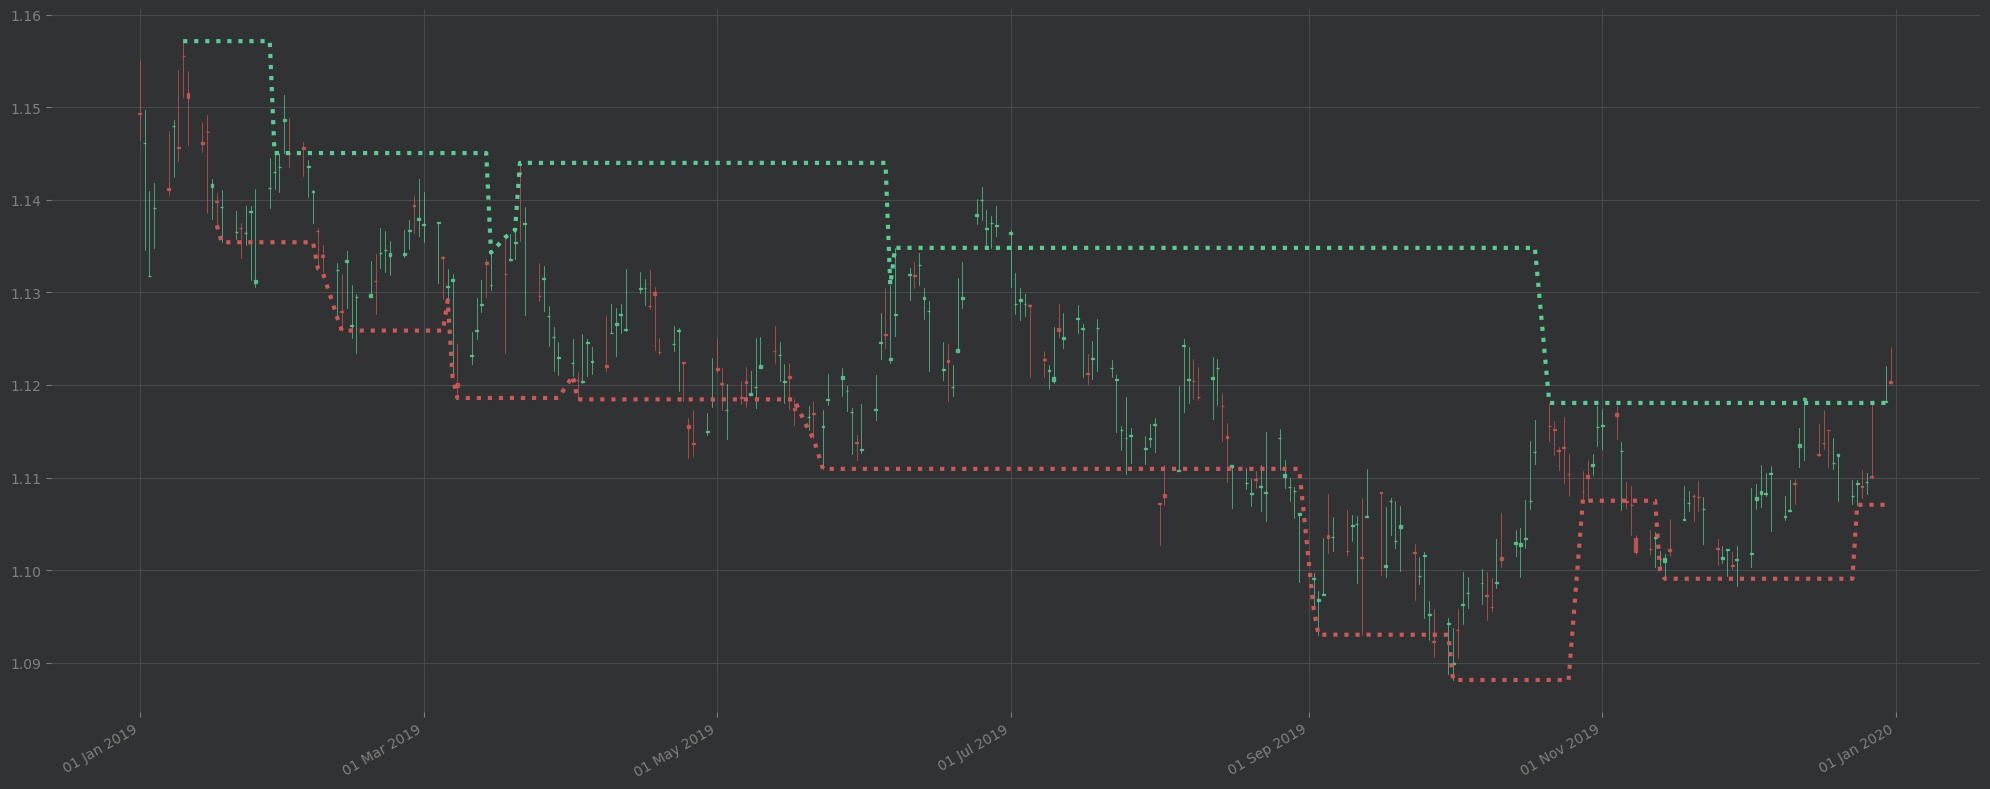

In [36]:
df = dataframe.loc["2019"]

# Inicializar el gráfico
fig, ax = plt.subplots()

# Representar el candlestick
candlestick_ohlc(
    ax,
    df[["date", "open", "high", "low", "close"]].values,
    width=0.6,
    colorup="#57CE95",
    colordown="#CE5757",
    alpha=0.8,
)

# Poner la fecha como eje x
date_format = mpl_dates.DateFormatter("%d %b %Y")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

# Representar líneas de resistencia
plt.plot(
    df["support"].fillna(method="ffill"), color="#CE5757", linestyle=":", linewidth=3
)


# Representar líneas de soporte
plt.plot(
    df["resistance"].fillna(method="ffill"), color="#57CE95", linestyle=":", linewidth=3
)

# Mostrar la figura
fig.show()

# Estrategia de Soporte y Estrategia


In [38]:
# Crear la señal
df["signal"] = 0

# Suavizar el soporte y la resistencia para crear la estrategia
df["smooth resistance"] = df["resistance"].fillna(method="ffill")
df["smooth support"] = df["support"].fillna(method="ffill")

# Crear condiciones de compra
condition_1_buy = (df["close"].shift(1) < df["smooth resistance"].shift(1)) & (
    df["smooth resistance"] * (1 + 0.0 / 100) < df["close"]
)

# Crear condiciones de venta
condition_1_sell = (df["close"].shift(1) > df["smooth support"].shift(1)) & (
    df["smooth support"] * (1 - 0.0 / 100) > df["close"]
)


# Colocar la señal
df.loc[condition_1_buy, "signal"] = 1
df.loc[condition_1_sell, "signal"] = -1

<Axes: xlabel='time'>

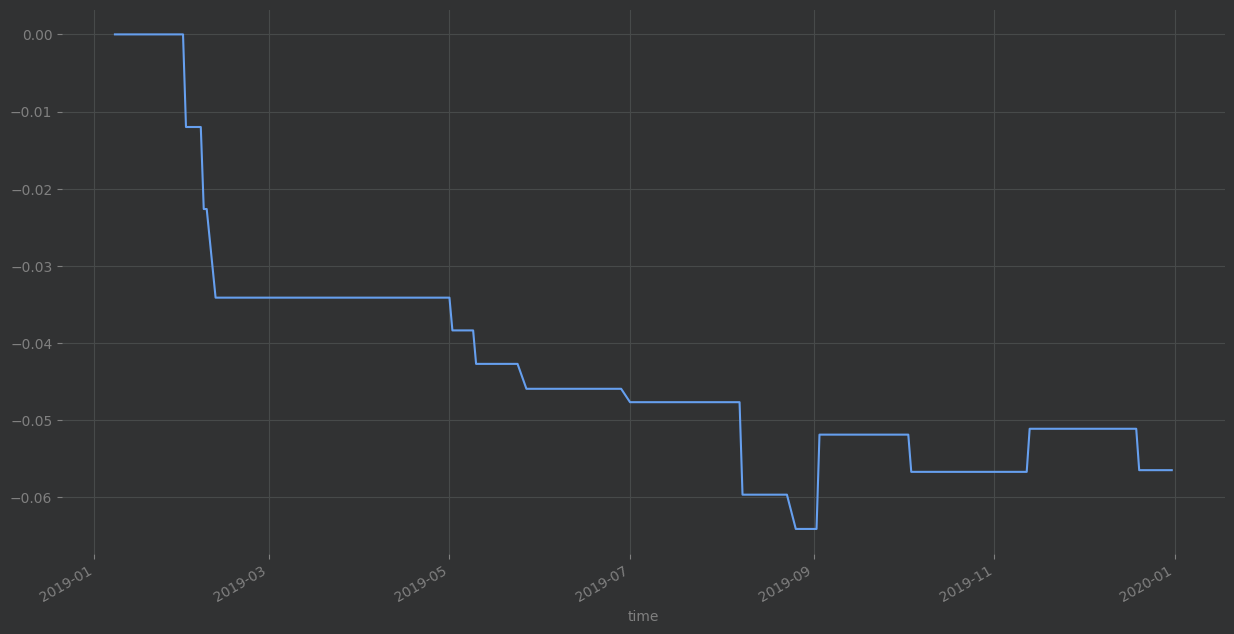

In [39]:
duration = 5

# Compute the percentage of variation of the asset
df["pct"] = df["close"].pct_change(1)

# Compute the return of the strategy
df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (
    df["signal"].shift(duration)
)


df["return"].cumsum().plot(figsize=(15, 8))

# Soporte y Resistencia + SMA


<Axes: xlabel='time'>

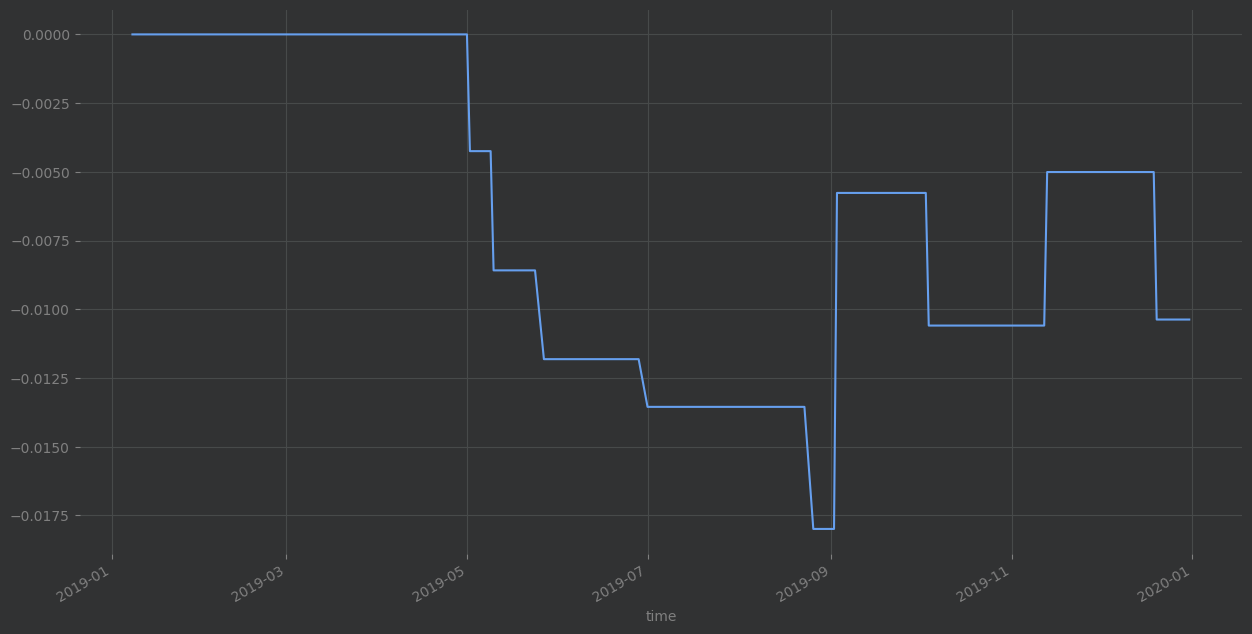

In [42]:
# Crear media móvil simple de 30 días
df["SMA fast"] = df["close"].rolling(30).mean()

# Crear media móvil simple de 60 días
df["SMA slow"] = df["close"].rolling(60).mean()

condition_2_buy = df["SMA fast"] > df["SMA slow"]
condition_2_sell = df["SMA fast"] < df["SMA slow"]


df["signal"] = 0

df.loc[condition_1_buy & condition_2_buy, "signal"] = 1
df.loc[condition_1_sell & condition_2_sell, "signal"] = -1


# Calcular el porcentaje de variación del activo
df["pct"] = df["close"].pct_change(1)

# Calcular la rentabilidad de la estrategia
df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (
    df["signal"].shift(duration)
)

df["return"].cumsum().plot(figsize=(15, 8))

# Soporte y Resistencia + SMA + RSI


<Axes: xlabel='time'>

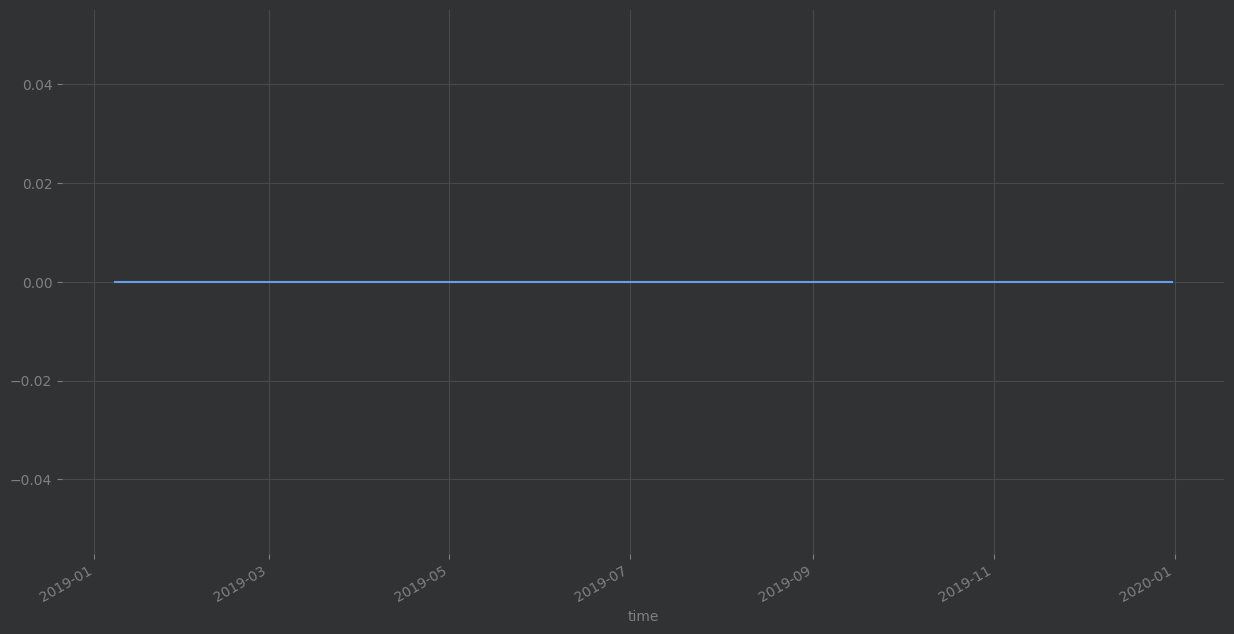

In [43]:
df["rsi"] = ta.momentum.RSIIndicator(df["close"], window=10).rsi()

# RSI de ayer
df["rsi yersteday"] = df["rsi"].shift(1)

df["signal"] = 0
condition_3_buy = df["rsi"] < df["rsi yersteday"]

condition_3_sell = df["rsi"] > df["rsi yersteday"]


df.loc[condition_1_buy & condition_2_buy & condition_3_buy, "signal"] = 1
df.loc[condition_1_sell & condition_2_sell & condition_3_sell, "signal"] = -1


# Calcular el porcentaje de variación del activo
df["pct"] = df["close"].pct_change(1)

# Calcular la rentabilidad de la estrategia
df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (
    df["signal"].shift(duration)
)

df["return"].cumsum().plot(figsize=(15, 8))

# Automatizar el proceso


In [44]:
def support_resistance(df, duration=5, spread=0):
    """EL DATAFRAME NECESITA TENER los siguientes nombres de columna: alta, baja, cierre"""

    # Support and resistance building
    df["support"] = np.nan
    df["resistance"] = np.nan

    df.loc[
        (df["low"].shift(5) > df["low"].shift(4))
        & (df["low"].shift(4) > df["low"].shift(3))
        & (df["low"].shift(3) > df["low"].shift(2))
        & (df["low"].shift(2) > df["low"].shift(1))
        & (df["low"].shift(1) > df["low"].shift(0)),
        "support",
    ] = df["low"]

    df.loc[
        (df["high"].shift(5) < df["high"].shift(4))
        & (df["high"].shift(4) < df["high"].shift(3))
        & (df["high"].shift(3) < df["high"].shift(2))
        & (df["high"].shift(2) < df["high"].shift(1))
        & (df["high"].shift(1) < df["high"].shift(0)),
        "resistance",
    ] = df["high"]

    # Create Simple moving average 30 days
    df["SMA fast"] = df["close"].rolling(30).mean()

    # Create Simple moving average 60 days
    df["SMA slow"] = df["close"].rolling(60).mean()

    df["rsi"] = ta.momentum.RSIIndicator(df["close"], window=10).rsi()

    # RSI yersteday
    df["rsi yersteday"] = df["rsi"].shift(1)

    # Create the signal
    df["signal"] = 0

    df["smooth resistance"] = df["resistance"].fillna(method="ffill")
    df["smooth support"] = df["support"].fillna(method="ffill")

    # Condiciones de compra
    condition_1_buy = (df["close"].shift(1) < df["smooth resistance"].shift(1)) & (
        df["smooth resistance"] * (1 + 0.5 / 100) < df["close"]
    )
    condition_2_buy = df["SMA fast"] > df["SMA slow"]

    condition_3_buy = df["rsi"] < df["rsi yersteday"]

    # Condiciones de venta
    condition_1_sell = (df["close"].shift(1) > df["smooth support"].shift(1)) & (
        df["smooth support"] * (1 + 0.5 / 100) > df["close"]
    )
    condition_2_sell = df["SMA fast"] < df["SMA slow"]

    condition_3_sell = df["rsi"] > df["rsi yersteday"]

    # Verificar condiciones
    df.loc[condition_1_buy & condition_2_buy & condition_3_buy, "signal"] = 1
    df.loc[condition_1_sell & condition_2_sell & condition_3_sell, "signal"] = -1

    # Calculamos las ganancias
    df["pct"] = df["close"].pct_change(1)

    df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(
        axis=0
    ) * (df["signal"].shift(duration))
    df.loc[df["return"] == -1, "return"] = df["return"] - spread
    df.loc[df["return"] == 1, "return"] = df["return"] - spread

    return df["return"]

In [49]:
# Función de Pre Procesado


def preprocessing_min(name):
    # Import the data
    df = pd.read_csv(
        name, delimiter="\t", index_col=["<DATE>", "<TIME>"], parse_dates=True
    ).dropna()

    # Delete the two last columns
    df = df.iloc[:, :-2]

    # Rename
    df.columns = ["open", "high", "low", "close", "volume"]
    # df.index.name = "time"
    return df

<Axes: xlabel='time'>

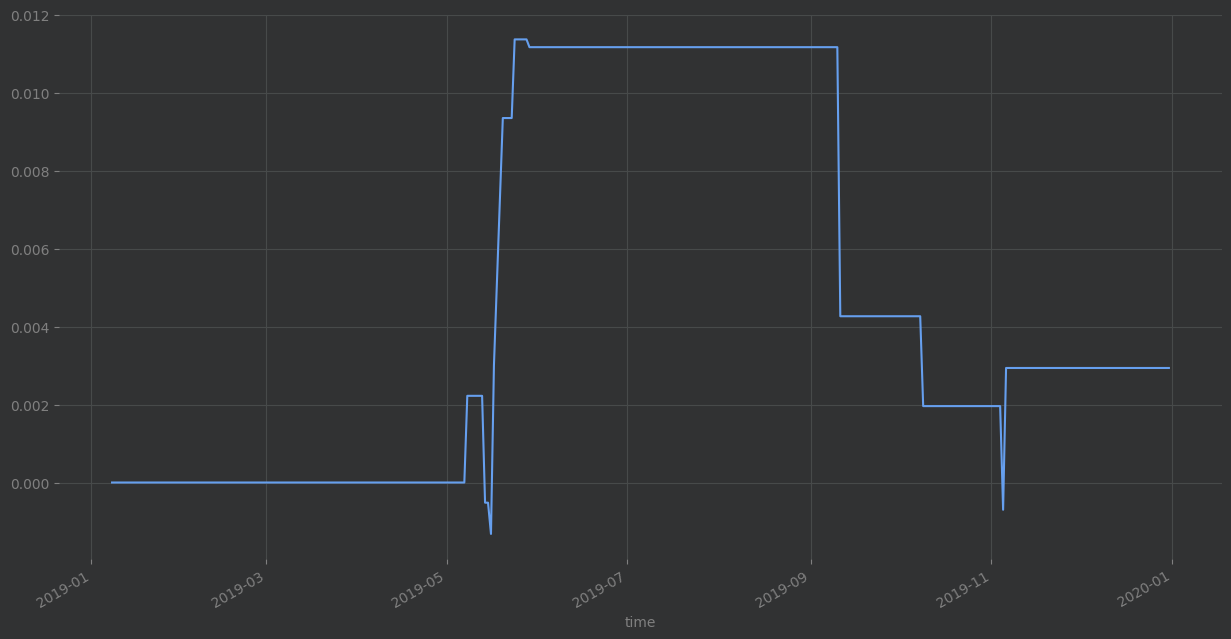

In [51]:
dfc = preprocessing_min("./FOREX M1/EURUSD_M1.csv")
dfc


support_resistance(df).cumsum().plot(figsize=(15, 8))

In [52]:
dfc

open     high      low    close  volume
<DATE>     <TIME>                                                         
2021-11-17 2023-08-01 16:17:00  1.13006  1.13033  1.13006  1.13023     103
           2023-08-01 16:18:00  1.13023  1.13029  1.13010  1.13028      53
           2023-08-01 16:19:00  1.13028  1.13045  1.13027  1.13038      72
           2023-08-01 16:20:00  1.13037  1.13045  1.13034  1.13039     100
           2023-08-01 16:21:00  1.13039  1.13044  1.13032  1.13038      45
...                                 ...      ...      ...      ...     ...
2022-02-23 2023-08-01 08:01:00  1.13267  1.13280  1.13265  1.13275      20
           2023-08-01 08:02:00  1.13275  1.13275  1.13271  1.13272      12
           2023-08-01 08:03:00  1.13272  1.13272  1.13267  1.13268      10
           2023-08-01 08:04:00  1.13269  1.13270  1.13267  1.13268      13
           2023-08-01 08:05:00  1.13268  1.13275  1.13268  1.13275      15

[99939 rows x 5 columns]

<Axes: xlabel='<DATE>,<TIME>'>

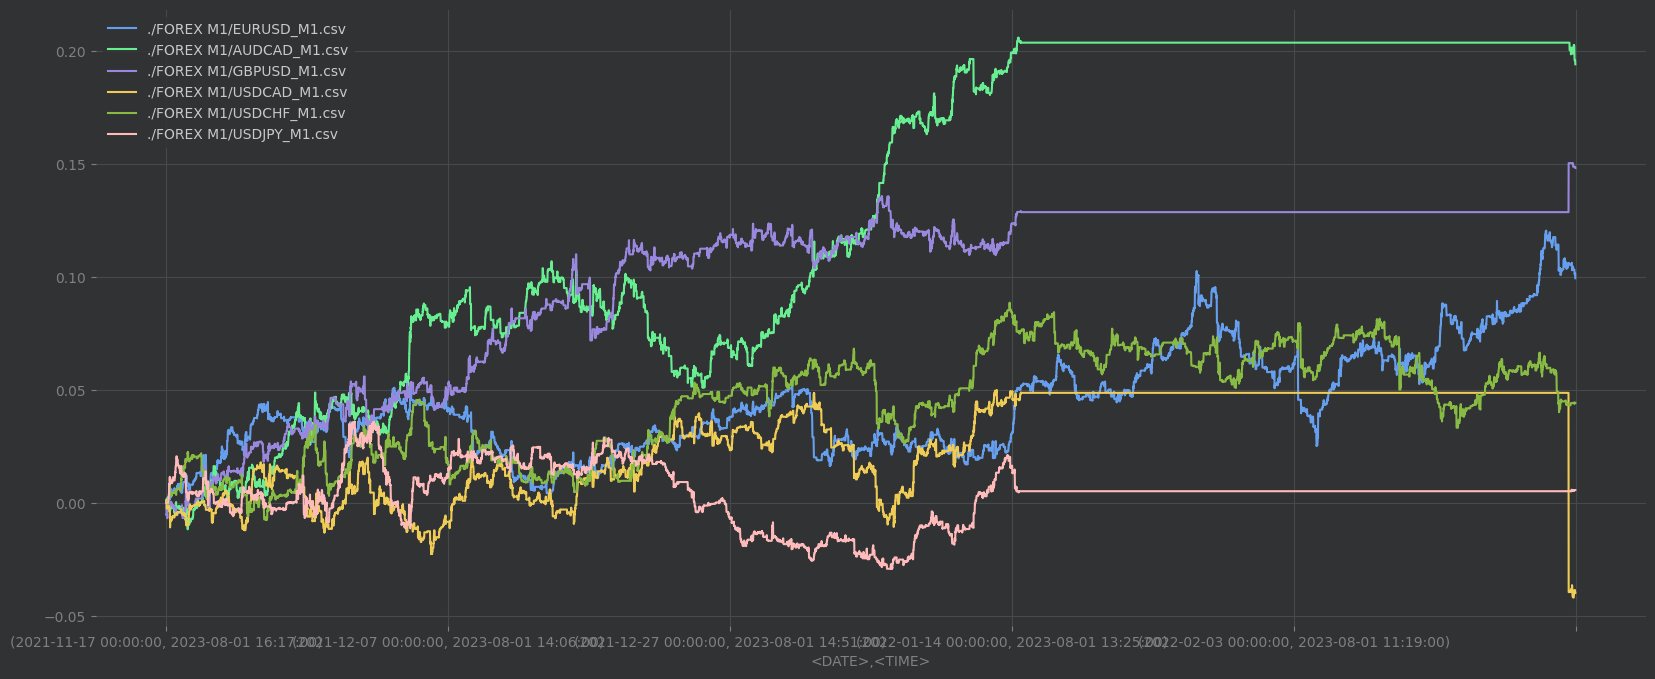

In [54]:
# Lista de assets
listnames = [
    "./FOREX M1/EURUSD_M1.csv",
    "./FOREX M1/AUDCAD_M1.csv",
    "./FOREX M1/GBPUSD_M1.csv",
    "./FOREX M1/USDCAD_M1.csv",
    "./FOREX M1/USDCHF_M1.csv",
    "./FOREX M1/USDJPY_M1.csv",
]
returns = pd.DataFrame()

# Calcular la rentabilidad de cada estrategia
for name in listnames:
    dfc = preprocessing_min(name)
    returns[name] = support_resistance(dfc, duration=10, spread=0.0001)

# Representar los resultados
returns.fillna(value=0).cumsum().plot()

# Diversificar la cartera


In [55]:
returns["portfolio"] = returns.sum(axis=1) / returns.shape[1]

In [56]:
def drawdown_function(serie):
    # Calculamos la suma de los rendimientos
    cum = serie.dropna().cumsum() + 1

    # Calculamos el máximo de la suma en el período (acumulamos el máximo) # (1,3,5,3,1) --> (1,3,5,5,5)
    running_max = np.maximum.accumulate(cum)

    # Calculamos el drawdown
    drawdown = cum / running_max - 1
    return drawdown

In [58]:
# Dataframe vacío
values = pd.DataFrame(index=["RETURN", "DRAWDOWN", "RETURN DRAWDOWN RATIO"])

# Calculamos retorno/drawdown
for col in returns.columns:
    ret = returns[col].dropna().cumsum().iloc[-1]
    dd = -np.min(drawdown_function(returns[col].dropna()))
    ret_dd = ret / dd

    values[col] = ret, dd, ret_dd

values.transpose().sort_values(by="RETURN DRAWDOWN RATIO", ascending=False)

,RETURN,DRAWDOWN,RETURN DRAWDOWN RATIO
./FOREX M1/GBPUSD_M1.csv,0.148140,0.034325,4.315870
portfolio,0.075286,0.017643,4.267281
./FOREX M1/AUDCAD_M1.csv,0.194051,0.050614,3.833980
./FOREX M1/EURUSD_M1.csv,0.099394,0.070223,1.415415
./FOREX M1/USDCHF_M1.csv,0.044210,0.050860,0.869243
./FOREX M1/USDJPY_M1.csv,0.005651,0.062849,0.089915
./FOREX M1/USDCAD_M1.csv,-0.039733,0.087582,-0.453669
